In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set(style="whitegrid")

In [11]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv.zip to netflix_titles.csv.zip


In [15]:
import zipfile

with zipfile.ZipFile("netflix_titles.csv.zip", 'r') as z:
    with z.open("netflix_titles.csv") as f:
        df = pd.read_csv(f)

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nColumn names:\n", df.columns.tolist())

Rows: 8807, Columns: 12

Column names:
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [18]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [21]:
df.dropna(subset=["type", "title", "release_year"], inplace=True)


In [23]:
df['country'] = df['country'].fillna("Unknown")


In [24]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

/tmp/ipython-input-1551529536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


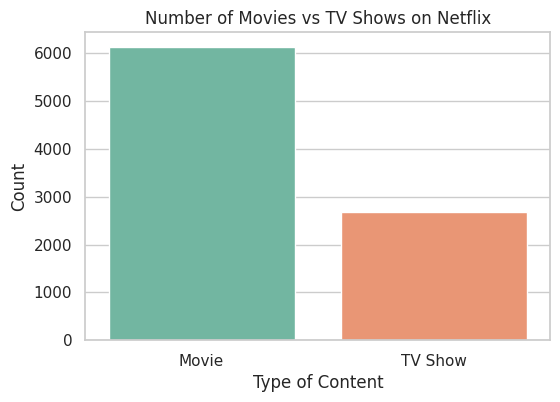

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()

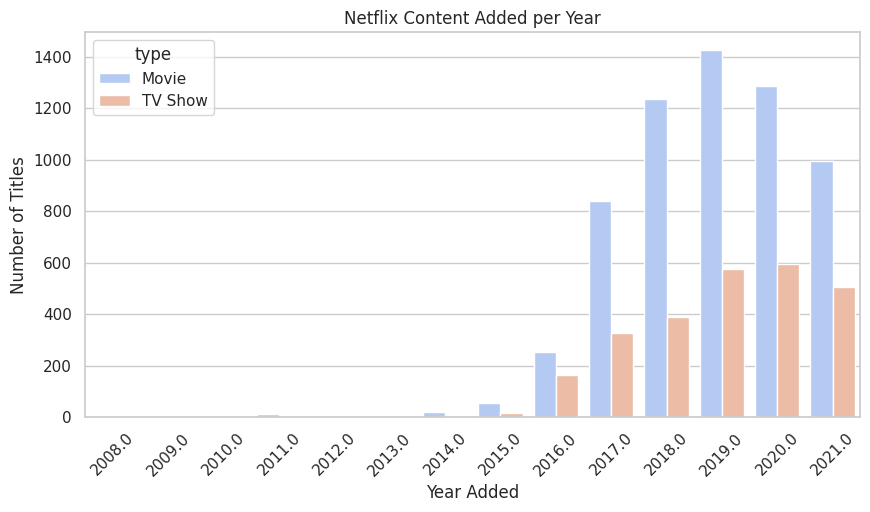

In [26]:
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year_added', hue='type', palette='coolwarm')
plt.title("Netflix Content Added per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-936988579.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


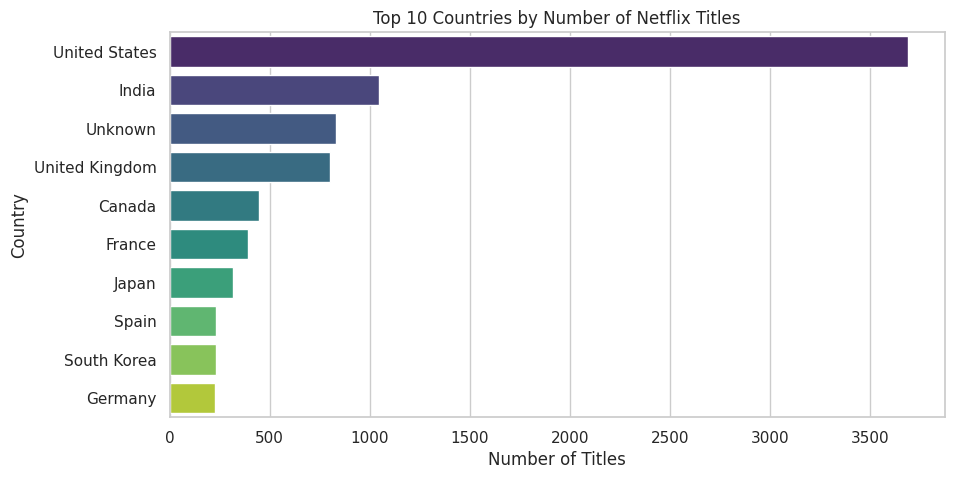

In [27]:
df_countries = df['country'].dropna().str.split(', ')
countries = df_countries.explode()
top_countries = countries.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Number of Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

/tmp/ipython-input-1154737776.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


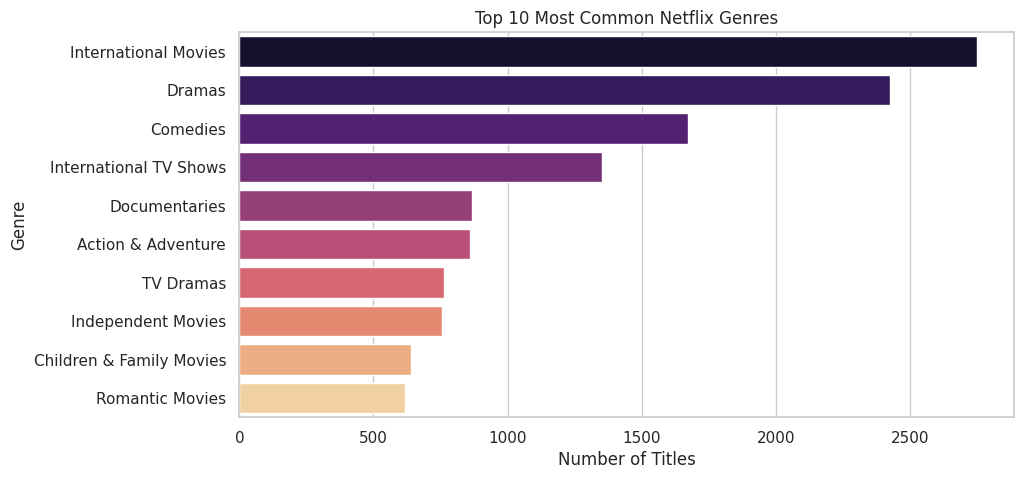

In [28]:
df_genres = df['listed_in'].str.split(', ')
all_genres = df_genres.explode()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title("Top 10 Most Common Netflix Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()